# GeoPandas

## Some Bullets

* GeoPandas is a project to add support for geographic data to pandas objects
* Implements GeoSeries and GeoDataFrame 
* Uses Shapely objects like Points, Lines and Polygons

# Installation
* conda install -c conda-forge geopandas
* pip install geopandas

## Some Links

http://geopandas.org

https://github.com/geopandas/geopandas

## google this for this notebook --> Bob Haffner github

## Or

## http://bit.ly/2bFZIuI

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
us = gpd.read_file('us.geojson')  #shape files too
type(us)

geopandas.geodataframe.GeoDataFrame

In [3]:
us.head()  #All the familiar methods and attributes from pandas

,adm1_code,featurecla,geometry,scalerank
0,USA-3514,Admin-1 scale rank,"POLYGON ((-89.59940899999999 48.010274, -89.48...",2
1,USA-3515,Admin-1 scale rank,"POLYGON ((-111.194189 44.561156, -111.291548 4...",2
2,USA-3516,Admin-1 scale rank,"POLYGON ((-96.601359 46.351357, -96.5389080000...",2
3,USA-3517,Admin-1 scale rank,"(POLYGON ((-155.93665 19.05939, -155.90806 19....",2
4,USA-3518,Admin-1 scale rank,"POLYGON ((-111.049728 44.488163, -111.050245 4...",2


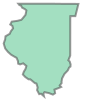

In [4]:
us['geometry'][33] 

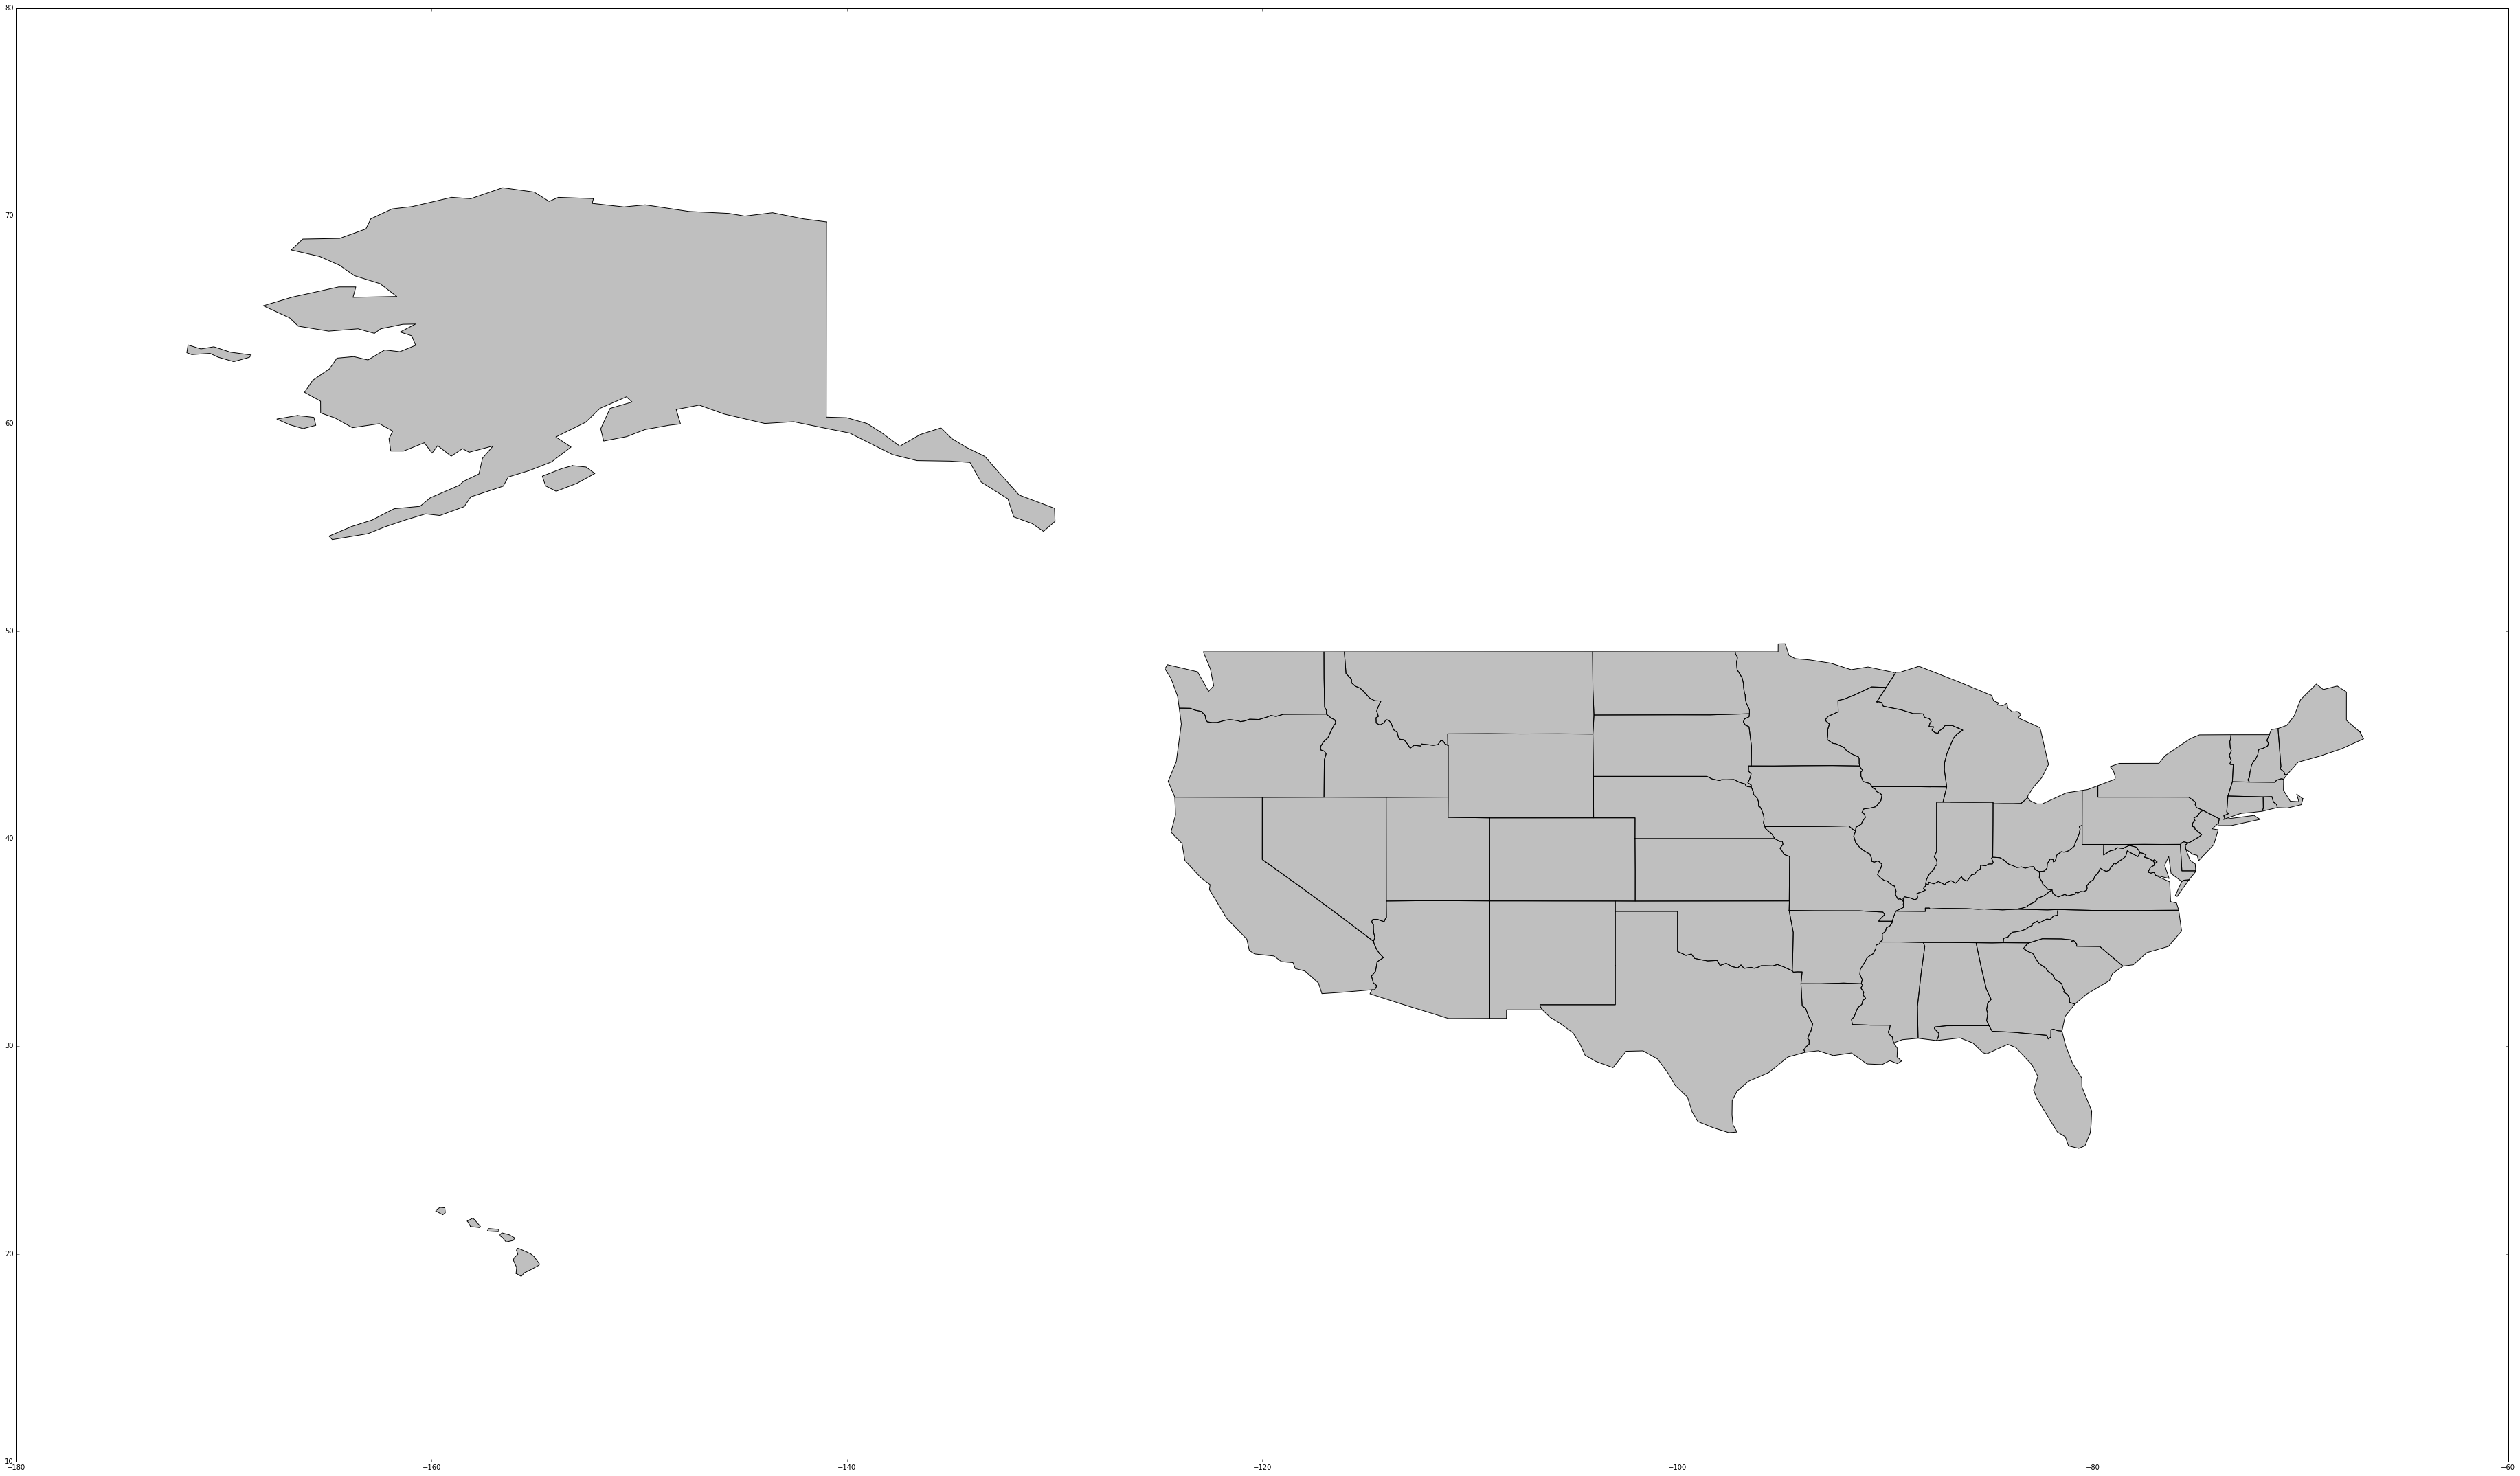

In [5]:
us.plot(figsize=(65,85),color='grey')  #matplotlib

In [6]:
pandas_data_frame = pd.read_csv('locations.csv', dtype={'zipcode' : 'object'}) #IL, WI, IN and MI
print (pandas_data_frame.shape)
pandas_data_frame.head()

(4786, 6)


,id,zipcode,city,state,latitude,longitude
0,13117,47102,austin,in,38.749542,-85.802640
1,13118,47104,bethlehem,in,38.539230,-85.420510
2,13119,47601,boonville,in,38.047400,-87.262000
3,13120,47106,borden,in,38.466730,-85.945800
4,13122,47107,bradford,in,38.190314,-86.115257


In [7]:
#creating Shapely points and creating a GeoDataFrame
geometry = [Point(xy) for xy in zip(pandas_data_frame['longitude'], 
                                    pandas_data_frame['latitude'])] 
locations = gpd.GeoDataFrame(pandas_data_frame, geometry=geometry)
locations.head()

,id,zipcode,city,state,latitude,longitude,geometry
0,13117,47102,austin,in,38.749542,-85.802640,POINT (-85.80264 38.749542)
1,13118,47104,bethlehem,in,38.539230,-85.420510,POINT (-85.42050999999999 38.53923)
2,13119,47601,boonville,in,38.047400,-87.262000,POINT (-87.262 38.0474)
3,13120,47106,borden,in,38.466730,-85.945800,POINT (-85.94580000000001 38.46673)
4,13122,47107,bradford,in,38.190314,-86.115257,POINT (-86.115257 38.190314)


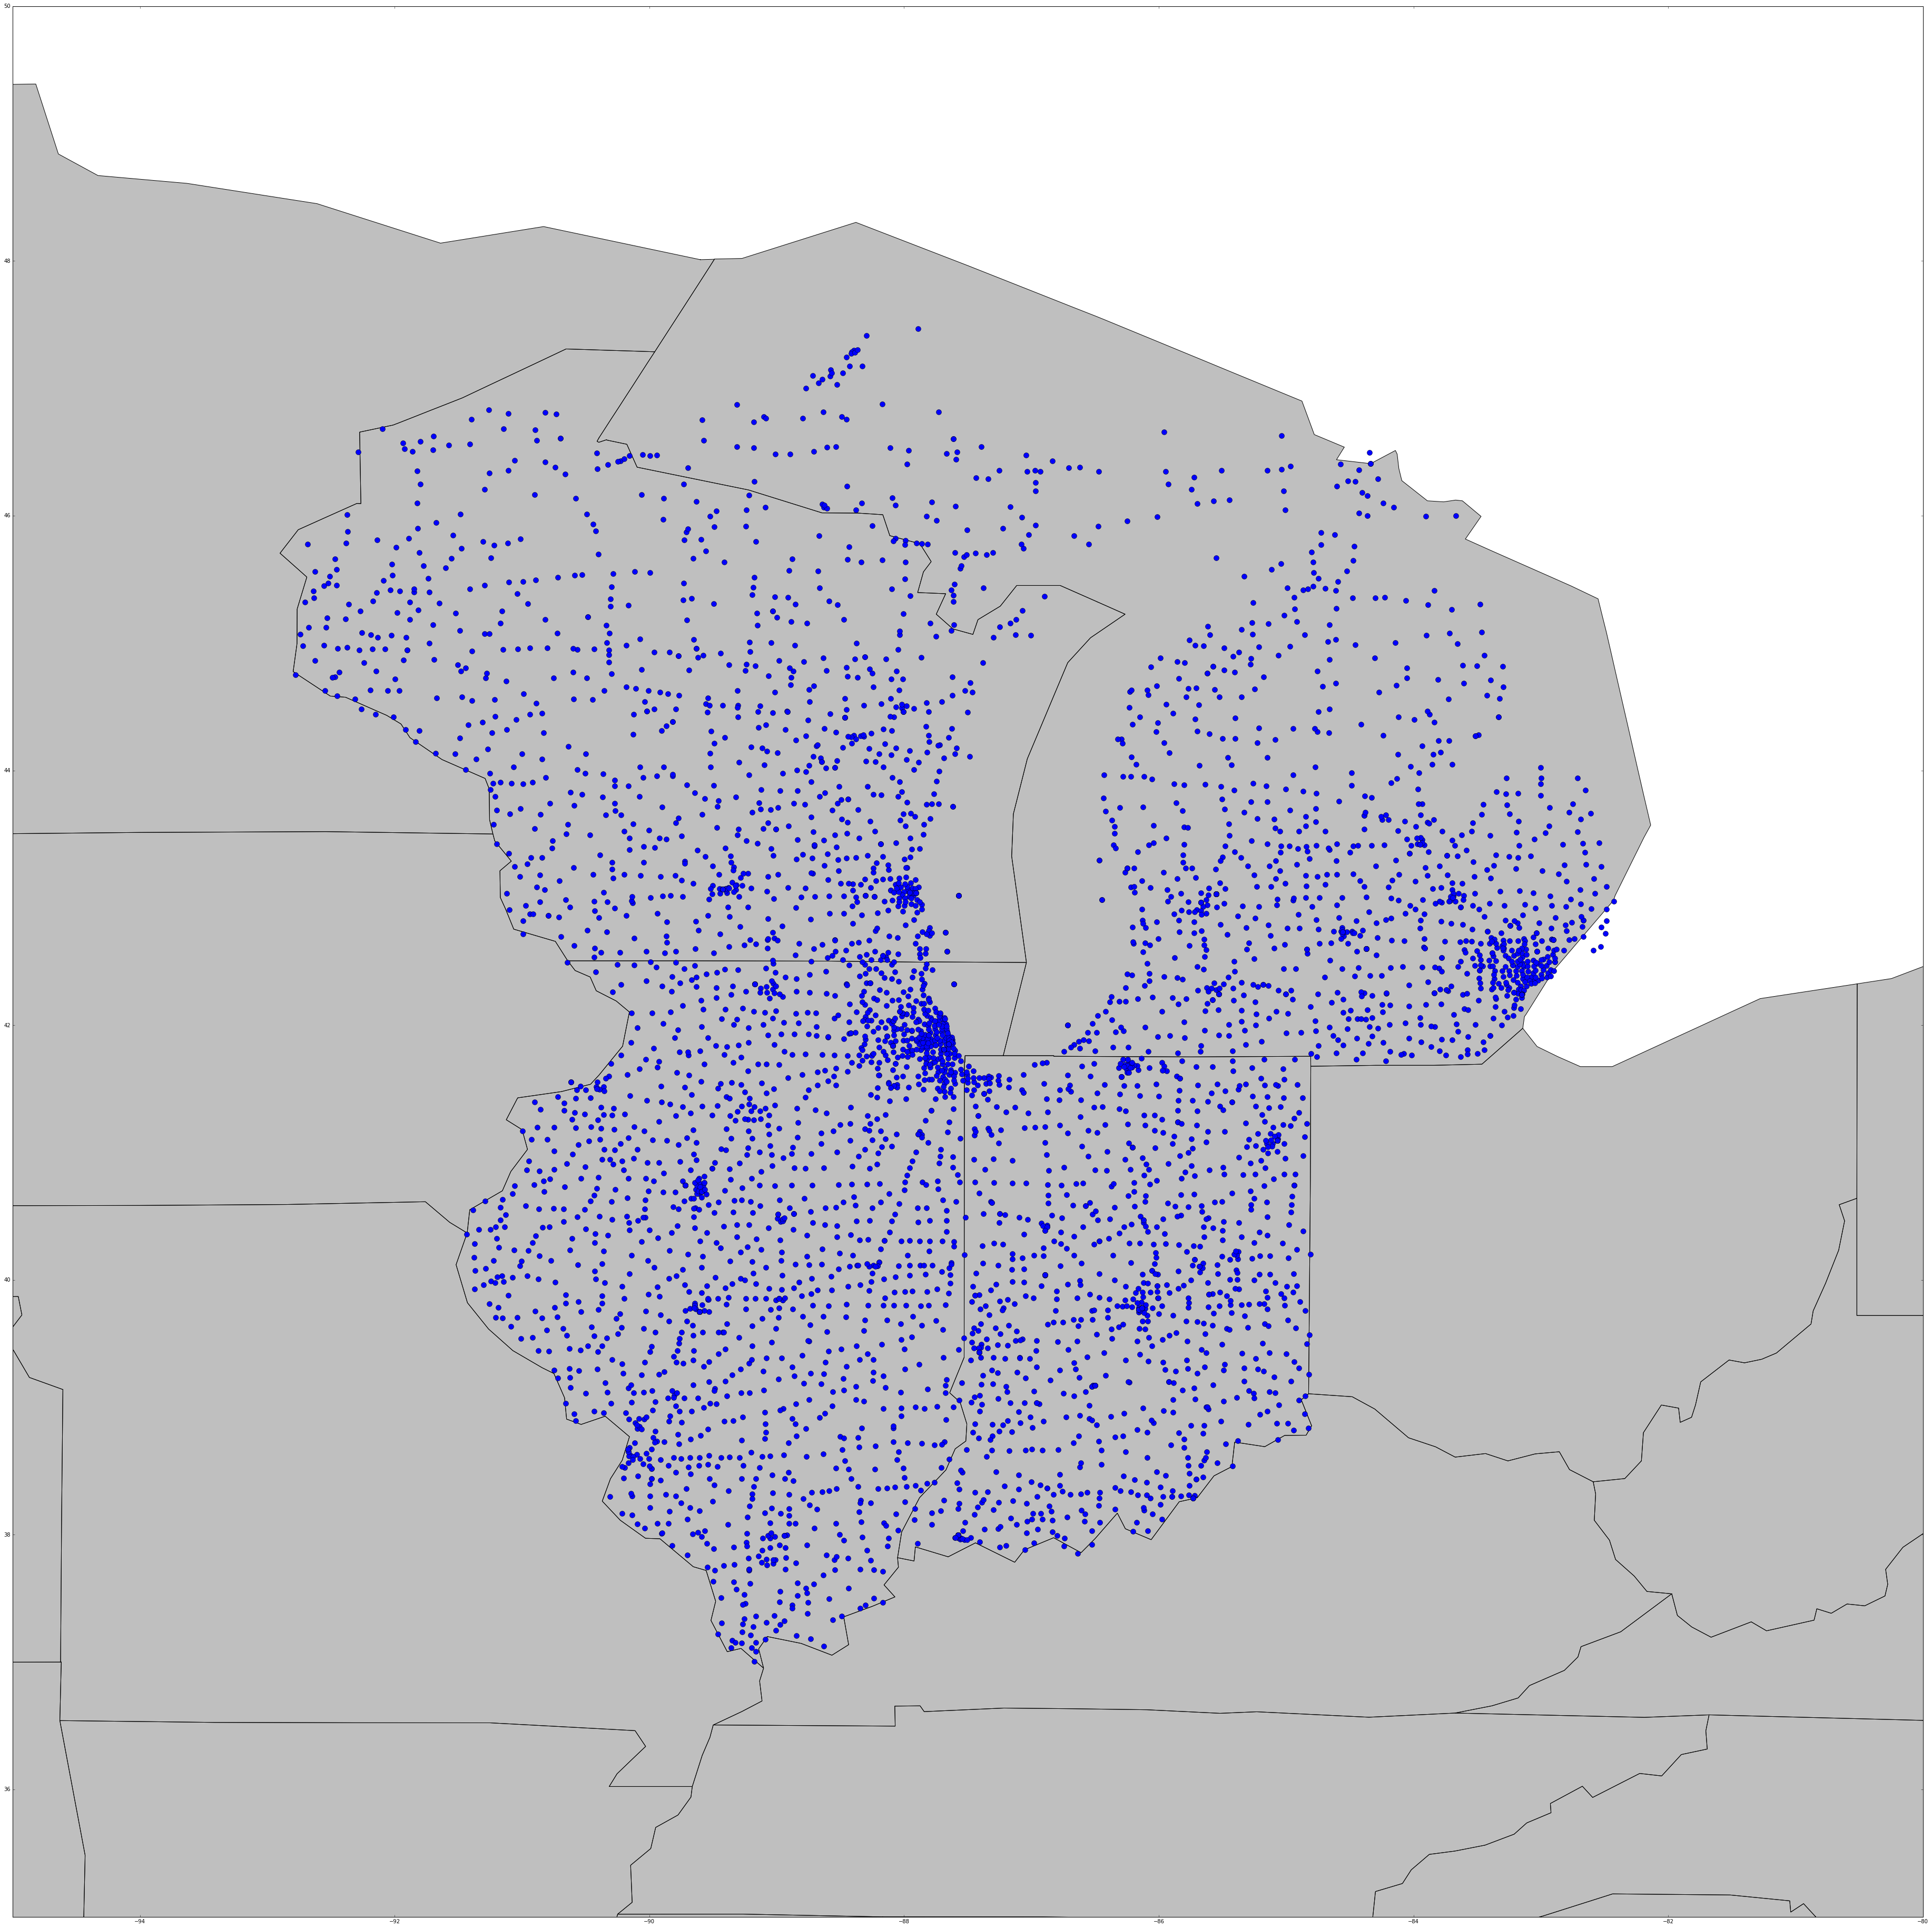

In [8]:
fig, ax = plt.subplots(figsize=(65,85))
ax.set_aspect('equal')
plt.axis([-95, -80, 35, 50])

us.plot(ax=ax, color='grey')
locations.plot(ax=ax, color='blue', markersize=10)   

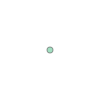

In [9]:
chicago = Point(-87.65005, 41.85003)
chicago

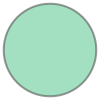

In [10]:
chicago_buffer  = chicago.buffer(1) #euclidean distance
chicago_buffer

In [11]:
chicago_area = locations.within(chicago_buffer)
chicago_area.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
chicago_area_locations = locations[chicago_area]
print (chicago_area_locations.shape)
chicago_area_locations.head()

(550, 7)


,id,zipcode,city,state,latitude,longitude,geometry
441,44515,46301,beverly shores,in,41.692540,-86.97753,POINT (-86.97753 41.69254)
461,44537,46302,boone grove,in,41.354760,-87.12947,POINT (-87.12947 41.35476)
505,44589,46303,cedar lake,in,41.364760,-87.44115,POINT (-87.44114999999999 41.36476)
511,44597,46304,chesterton,in,41.610590,-87.06420,POINT (-87.0642 41.61059)
549,44648,46307,crown point,in,41.418873,-87.34298,POINT (-87.34298000000004 41.418873)


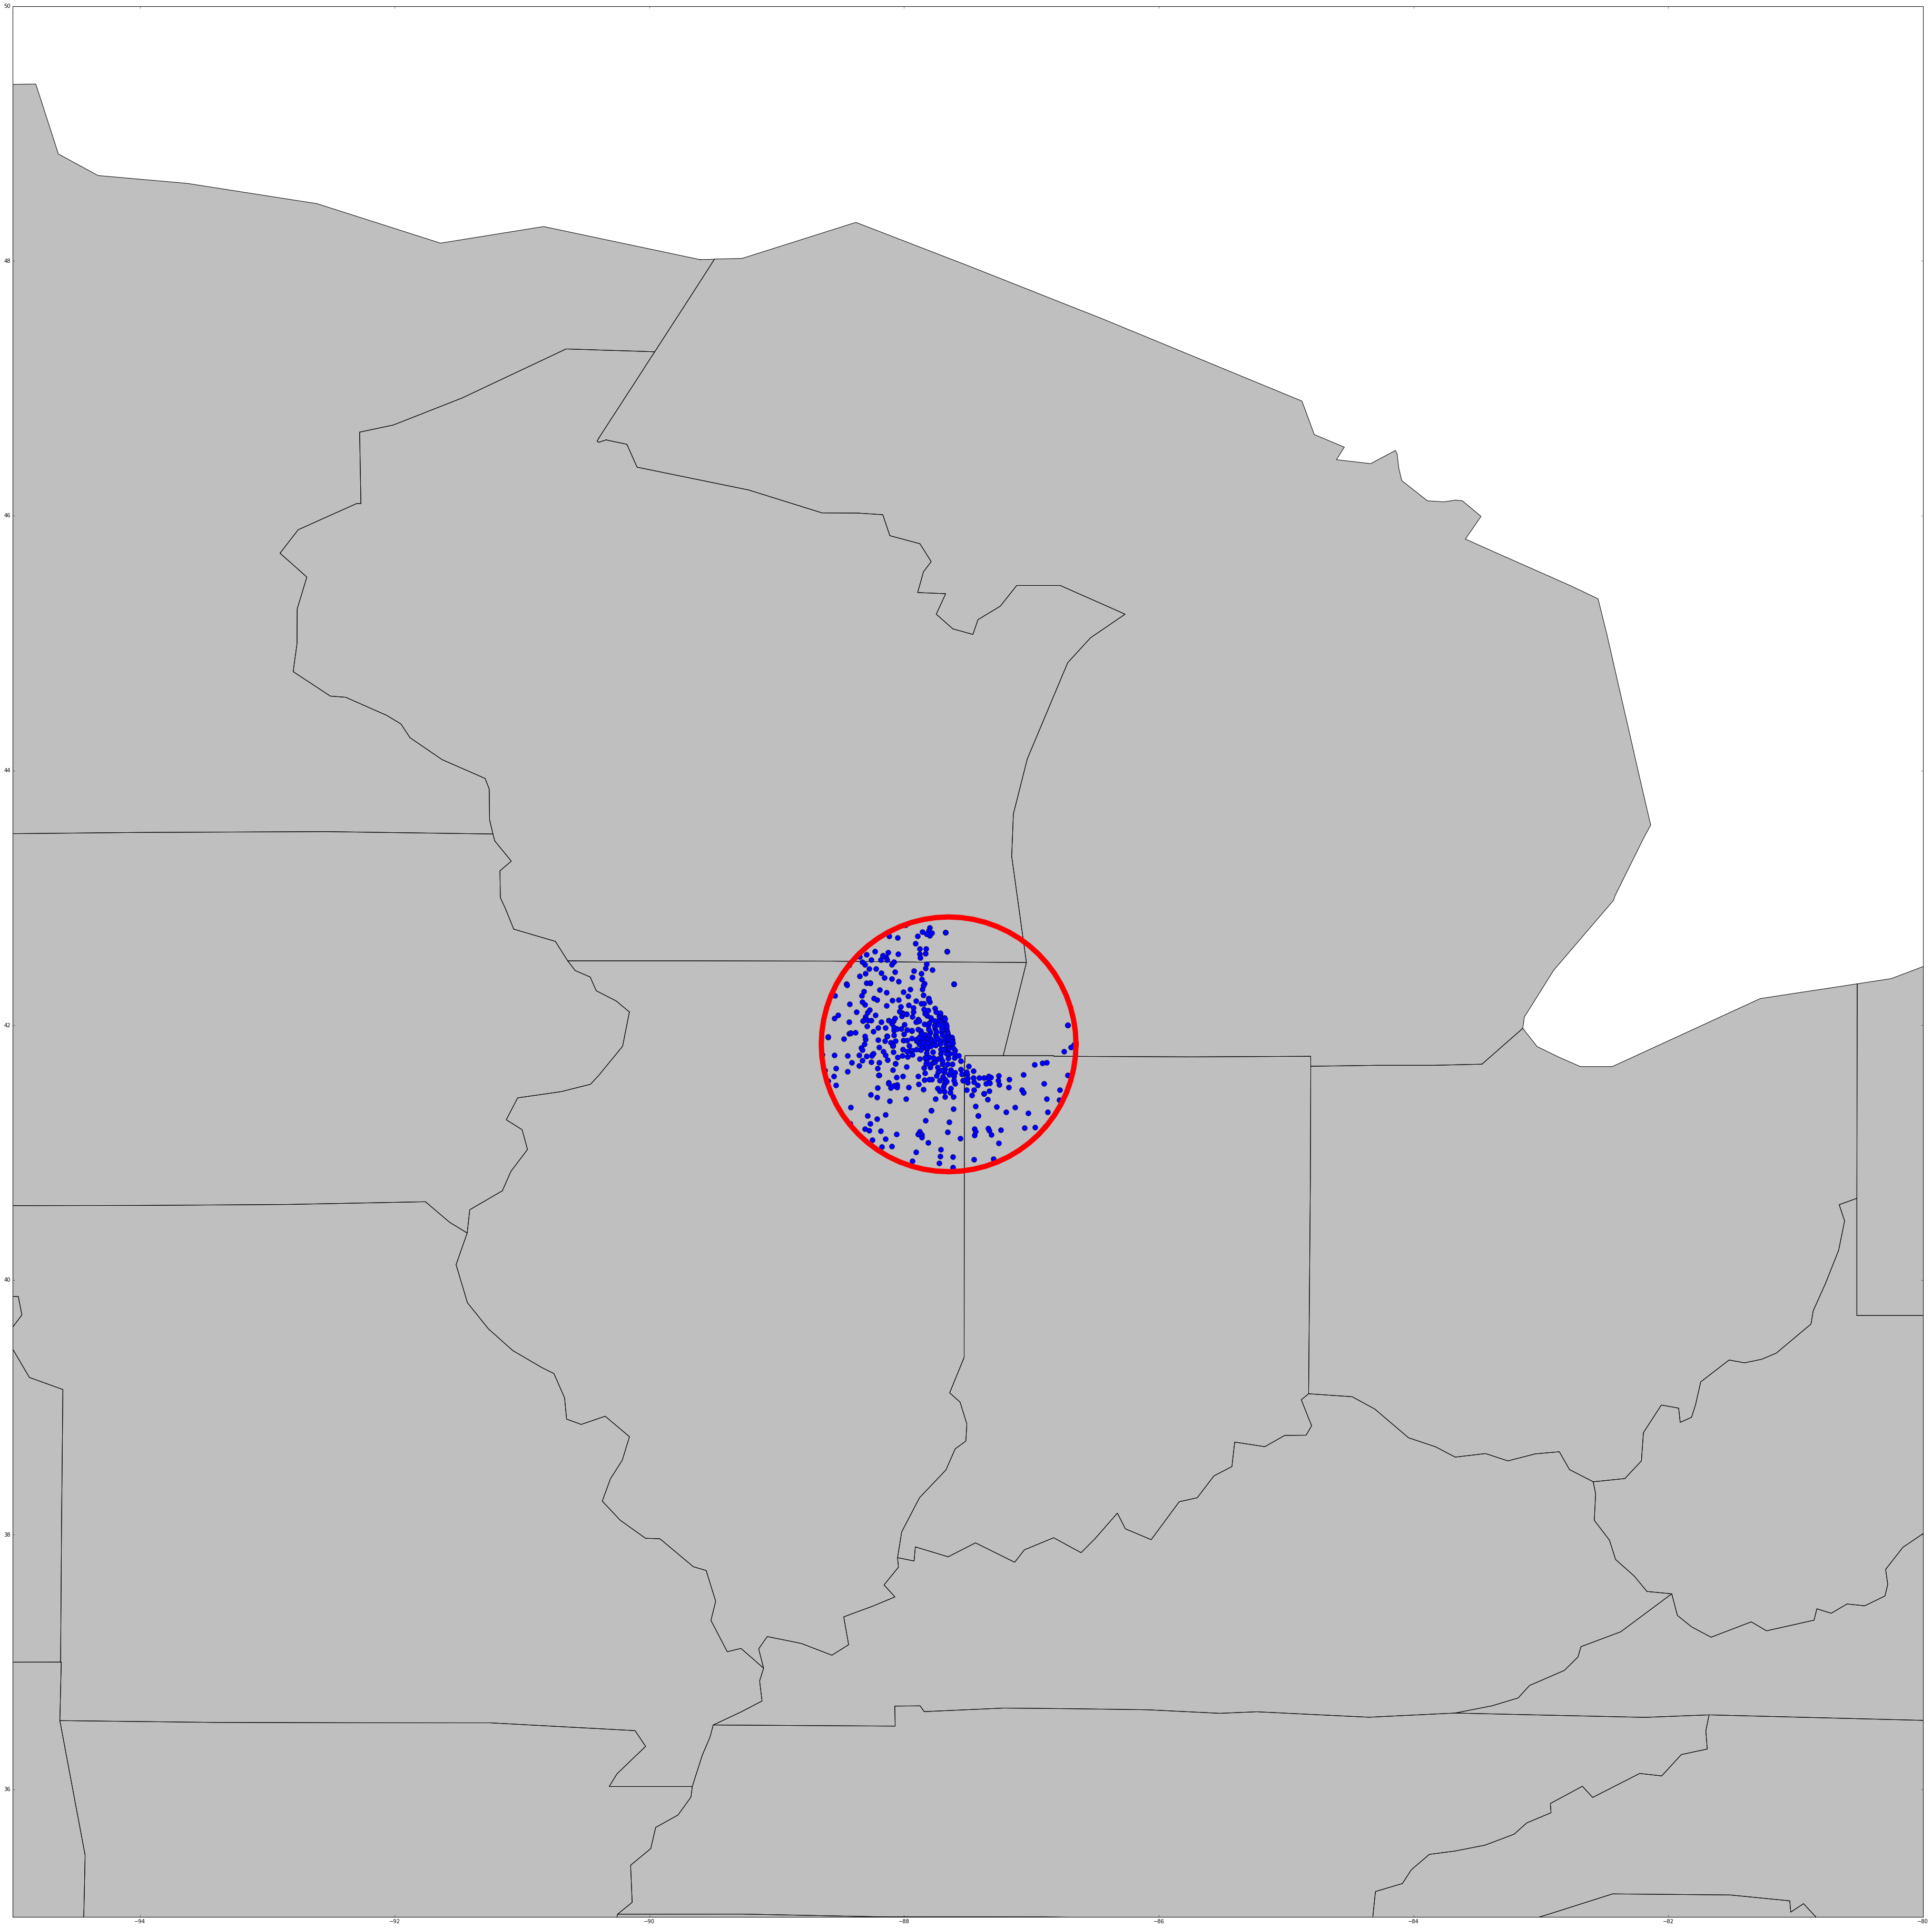

In [13]:
fig, ax = plt.subplots(figsize=(65,75))
ax.set_aspect('equal')
plt.axis([-95, -80, 35, 50])

us.plot(ax=ax, color='grey')
chicago_area_locations.plot(ax=ax, color='blue', markersize=10)  
ax.plot(chicago_buffer.exterior.xy[0], chicago_buffer.exterior.xy[1], color='red', linewidth=10)

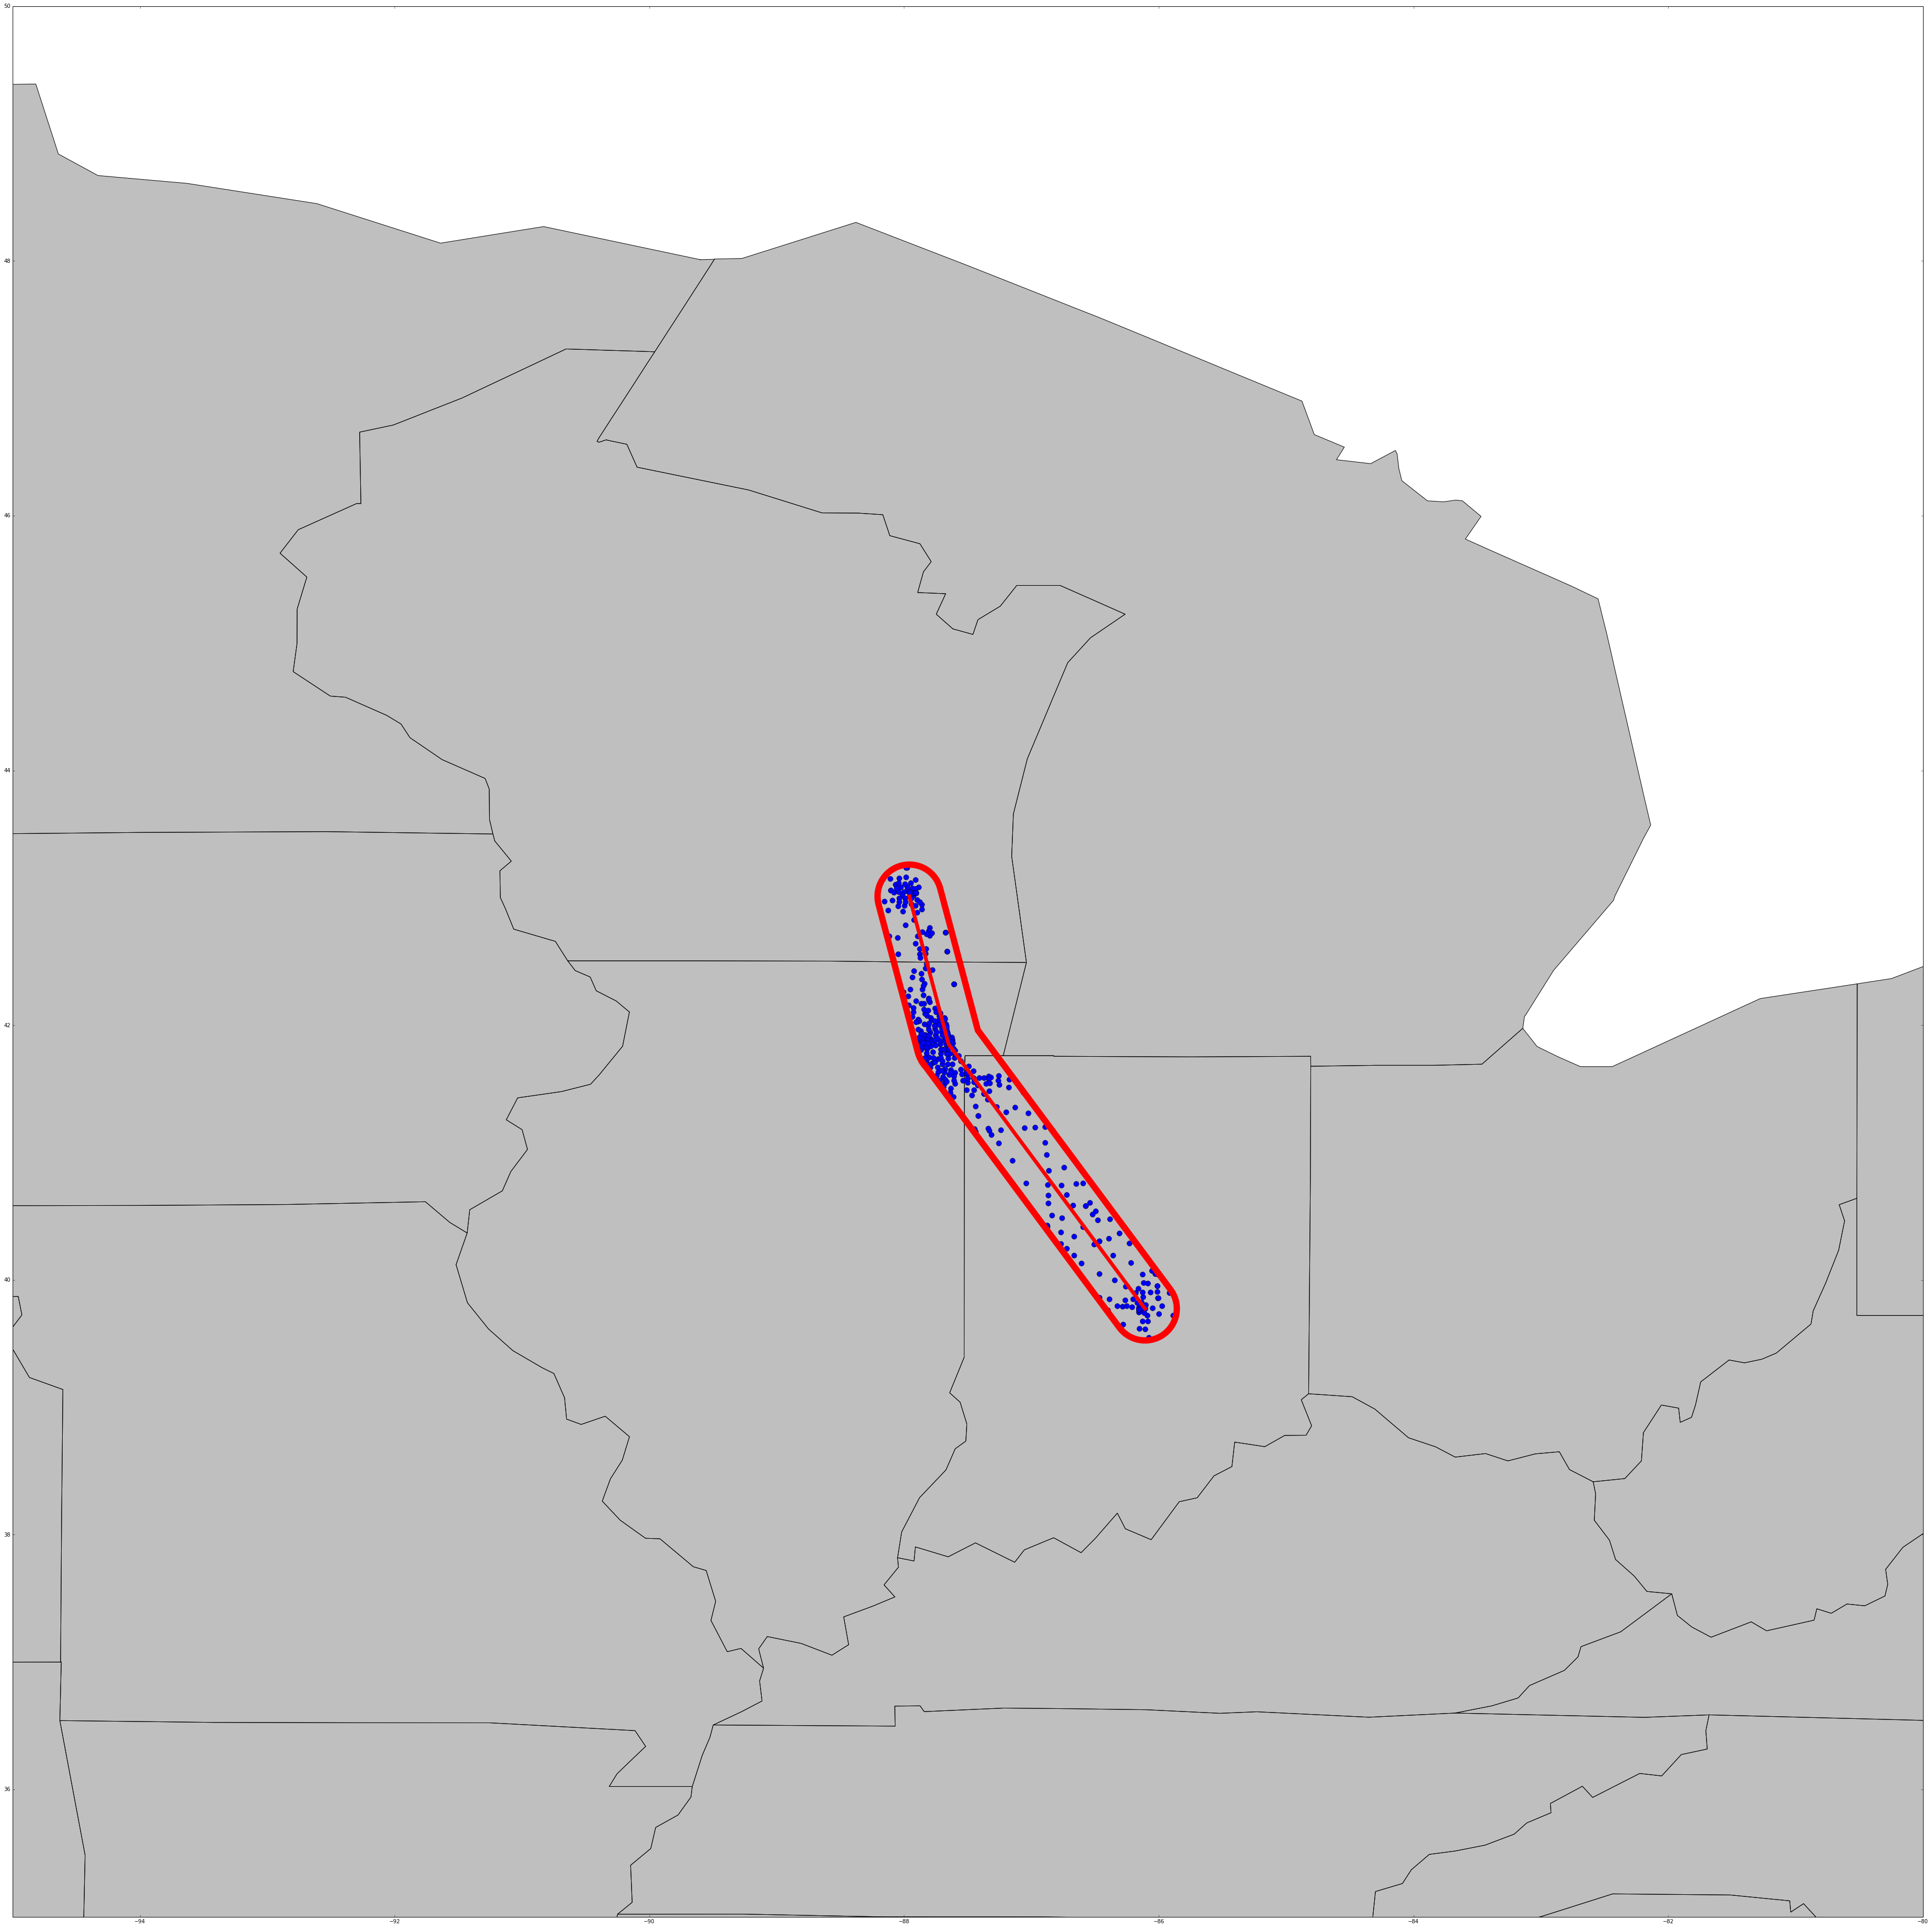

In [31]:
milwaukee = Point(-87.958409, 43.011264)
indy = Point(-86.10839, 39.775125)

indy_chicago_milwaukee = LineString([indy, chicago, milwaukee])
indy_chicago_milwaukee_buffer = indy_chicago_milwaukee.buffer(.25)
filter = locations.within(indy_chicago_milwaukee_buffer)
indy_chicago_milwaukee_locations = locations[filter]

fig, ax = plt.subplots(figsize=(65,75))
ax.set_aspect('equal')
plt.axis([-95, -80, 35, 50])

us.plot(ax=ax, color='grey')
indy_chicago_milwaukee_locations.plot(ax=ax, color='blue', markersize=10)  

ax.plot(indy_chicago_milwaukee.xy[0], indy_chicago_milwaukee.xy[1], color='red', linewidth=7)
ax.plot(indy_chicago_milwaukee_buffer.exterior.xy[0], indy_chicago_milwaukee_buffer.exterior.xy[1], 
                                color='red', linewidth=12)